In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
f = open('gumtree_all_data_ogloszenie.json', encoding='utf-8') 
data = json.load(f) 

lista = []
for i in data['oglosznie']: 
    lista.append(i) 
  
# Closing file 
f.close() 
df = pd.DataFrame(lista)

In [3]:
df.head()
print(df.shape) #(7520, 11)
df.info()

(7520, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 7520 non-null   object
 1   cena                 7494 non-null   object
 2   czas_wstawienia      7520 non-null   object
 3   data_dodania         3392 non-null   object
 4   na_sprzedaz_przez    3391 non-null   object
 5   rodzaj_nierucomosci  3391 non-null   object
 6   liczba_pokoi         3387 non-null   object
 7   wielkosc_m2          3366 non-null   object
 8   opis                 3392 non-null   object
 9   lokalizacja          3392 non-null   object
 10  lokalizacja_url      3392 non-null   object
dtypes: object(11)
memory usage: 646.4+ KB


In [103]:
df.describe() # mamy 2160 z 7520 unikalnych nazw ogloszeń,swiadczy to, że to samo ogloszenie moze byc wstawione kilka razy w przeciagu krotkiego czasu.
# df.head()

,name,cena,czas_wstawienia,data_dodania,na_sprzedaz_przez,rodzaj_nierucomosci,liczba_pokoi,wielkosc_m2,opis,lokalizacja,lokalizacja_url
count,7520,7494,7520,3392,3391,3391,3387,3366,3392,3392,3392
unique,2160,856,56,35,3,5,20,217,2346,43,188
top,"OD DEWELOPERA, 0%, BIAŁOŁĘKA - HENRYKÓW",499 000 zł,godzinę temu,17/02/2021,Agencja,Mieszkanie,2 pokoje,1 łazienka,Przedmiotem sprzedaży jest mieszkanie położone...,Wola,https://www.gumtree.pl/s-wola/v1l3200025p1
freq,63,101,2011,817,3317,3099,1213,842,8,556,556


In [6]:
df = df.drop(['czas_wstawienia', 'data_dodania', 'lokalizacja_url'], axis=1) # pzbywam sie niepotrzebnych danych


In [7]:
df.drop_duplicates(subset=['name'], inplace=True) #2160 rows × 8 columns

In [8]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

name                    0
cena                    9
na_sprzedaz_przez      11
rodzaj_nierucomosci    11
liczba_pokoi           13
wielkosc_m2            24
opis                   10
lokalizacja            10
dtype: int64
name                   0
cena                   0
na_sprzedaz_przez      0
rodzaj_nierucomosci    0
liczba_pokoi           0
wielkosc_m2            0
opis                   0
lokalizacja            0
dtype: int64


In [9]:
print(df.columns)
print(df['rodzaj_nierucomosci'].unique())
r = df[(df['rodzaj_nierucomosci'] == 'Inne') | (df['rodzaj_nierucomosci'] == '3 pokoje')].index
df.drop(r, inplace=True)

Index(['name', 'cena', 'na_sprzedaz_przez', 'rodzaj_nierucomosci',
       'liczba_pokoi', 'wielkosc_m2', 'opis', 'lokalizacja'],
      dtype='object')
['Mieszkanie' 'Dom' 'Inne' '3 pokoje']


In [10]:
print(df['liczba_pokoi'].unique())
lp = df[(df['liczba_pokoi'] == '128')].index
df.drop(lp, inplace=True)

['2 pokoje' '3 pokoje' '4 pokoje' 'Kawalerka lub garsoniera' '5 pokoi'
 '6 lub więcej pokoi' '128']


In [11]:
print(df['wielkosc_m2'].unique())
w = df[(df['wielkosc_m2'] == '1 łazienka') | (df['wielkosc_m2'] == '2 łazienki') | (df['wielkosc_m2'] == '3 łazienki') | (df['wielkosc_m2'] == '4 lub więcej łazienek')].index
df.drop(w, inplace=True)


['35' '54' '112' '1 łazienka' '20' '40' '53' '61' '52' '62' '45' '47' '27'
 '34' '31' '46' '33' '60' '25' '28' '78' '37' '49' '26' '57' '70' '22'
 '41' '29' '38' '19' '93' '160' '55' '170' '71' '48' '42' '96' '95' '65'
 '51' '538' '43' '83' '50' '68' '39' '44' '2 łazienki' '58' '63' '81'
 '109' '105' '77' '119' '86' '97' '56' '80' '36' '32'
 '4 lub więcej łazienek' '64' '73' '85' '72' '3 łazienki' '66' '23' '74'
 '59' '75' '100' '153' '143' '204' '118' '108' '200' '497' '385' '386'
 '361' '257' '220' '250' '400' '340' '280' '120' '741' '370' '420' '568'
 '84' '113' '82' '67' '122' '156' '69' '130' '30' '87' '98' '110' '128'
 '144' '107' '154' '14' '21' '149' '150' '90' '79' '24' '185' '140' '179'
 '76' '155' '600' '430' '263' '350' '630' '167' '360' '157' '89' '163'
 '91' '180' '88' '188' '92' '300' '320' '330' '240' '477' '236' '352'
 '282' '440' '169' '270' '273' '218' '230' '245' '287' '132' '175' '183'
 '260' '237' '275' '500' '147' '151' '520' '137' '285' '181' '380' '688'
 '450' 

In [12]:
print(df['lokalizacja'].unique())
l = df[(df['lokalizacja'] == 'Floryday') | (df['lokalizacja'] == 'Home Cinema\nCenter') | (df['lokalizacja'] == '4 State\nTrucks') | (df['lokalizacja'] == 'BuyRailings.com') | (df['lokalizacja'] == 'Scully &\nScully') | (df['lokalizacja'] == 'Jatai\nInternational') | (df['lokalizacja'] == 'Samuel\nPackaging Store') | (df['lokalizacja'] == 'Moltin Mats') | (df['lokalizacja'] == 'Georgia Reclaimed\nWood') | (df['lokalizacja'] == 'Shtoss.com') | (df['lokalizacja'] == 'Dlaczego ta reklama?') | (df['lokalizacja'] == 'Find Suv Deals') | (df['lokalizacja'] == 'Onemarket.pl') | (df['lokalizacja'] == 'Caribbijou') | (df['lokalizacja'] == 'obido.pl') | (df['lokalizacja'] == 'Madison\nSeating') | (df['lokalizacja'] == 'April Cornell')].index
df.drop(l, inplace=True)


['Śródmieście' 'Wola' 'Białołęka' 'Floryday' 'Home Cinema\nCenter'
 'Mokotów' 'Ochota' 'Bemowo' 'Ursynów' '4 State\nTrucks' 'Żoliborz'
 'Rembertów' 'Praga Południe' 'Ursus' 'Włochy' 'Bielany' 'Wilanów'
 'Wesoła' 'Wawer' 'BuyRailings.com' 'Scully &\nScully' 'Targówek'
 'Jatai\nInternational' 'Praga Północ' 'Samuel\nPackaging Store'
 'Moltin Mats' 'Georgia Reclaimed\nWood' 'Shtoss.com'
 'Dlaczego ta reklama?' 'Find Suv Deals' 'Onemarket.pl' 'Caribbijou'
 'obido.pl' 'Madison\nSeating' 'April Cornell']


In [13]:
for i in range(8):
    a = df.columns[i]
    print(df[a].unique())

['2 pokoje w Centrum Warszawy' '3 niezależne pokoje na Woli / Anielewicza'
 'OD DEWELOPERA, 0%, BIAŁOŁĘKA - HENRYKÓW' ... 'Garaż gratis !!'
 'Mieszkanie Warszawa Wilanów 91m2 (nr: 199602)'
 'Mieszkanie Warszawa Wola 92m2 (nr: 199601)']
['610 000 zł' '630 000 zł' '1 050 150 zł' '249 000 zł' '500 000 zł'
 '565 000 zł' '575 000 zł' '525 000 zł' '650 000 zł' '700 000 zł'
 '570 000 zł' '356 000 zł' '280 000 zł' '480 000 zł' '399 000 zł'
 '358 000 zł' '289 000 zł' '350 000 zł' '850 000 zł' '469 000 zł'
 '415 000 zł' '390 000 zł' '950 000 zł' '265 000 zł' '235 000 zł'
 '330 000 zł' '360 000 zł' '433 000 zł' '300 000 zł' '311 000 zł'
 '277 000 zł' '1 005 000 zł' '270 000 zł' '585 000 zł' '1 900 000 zł'
 '485 000 zł' '713 000 zł' '290 000 zł' '591 000 zł' '526 000 zł'
 '340 000 zł' '568 000 zł' '320 000 zł' '592 000 zł' '219 000 zł'
 '386 000 zł' '1 200 000 zł' '359 000 zł' '349 000 zł' '550 000 zł'
 '750 000 zł' '310 000 zł' '245 000 zł' '230 000 zł' '305 000 zł'
 '528 000 zł' '206 000 zł' '60

In [14]:
# df["cena"] = df["cena"].astype(str)
df['cena']  = df['cena'].apply(lambda x: x.replace(' ', ''))
df['cena'] = df['cena'].apply(lambda x: x.replace('zł', ''))

df['cena'] = pd.to_numeric(df['cena']) #, errors='coerce')
df['cena']

0        610000
1        630000
2       1050150
24       249000
25       500000
         ...   
7508     516450
7511     715781
7513    1061454
7516     812500
7517     967160
Name: cena, Length: 1272, dtype: int64

In [15]:
df['wielkosc_m2'] = pd.to_numeric(df['wielkosc_m2'])
df['wielkosc_m2']

0        35
1        54
2       112
24       20
25       40
       ... 
7508     62
7511     73
7513     93
7516     91
7517     92
Name: wielkosc_m2, Length: 1272, dtype: int64

In [16]:
df['cena_m2'] = np.round(df['cena'] / df['wielkosc_m2'], decimals=0)
df['cena_m2']

# np.round(df['Value'], decimals=3)

0       17429.0
1       11667.0
2        9376.0
24      12450.0
25      12500.0
         ...   
7508     8330.0
7511     9805.0
7513    11413.0
7516     8929.0
7517    10513.0
Name: cena_m2, Length: 1272, dtype: float64

In [30]:
##prezentacja graficzna danych## 
df.columns

Index(['name', 'cena', 'na_sprzedaz_przez', 'rodzaj_nierucomosci',
       'liczba_pokoi', 'wielkosc_m2', 'opis', 'lokalizacja', 'cena_m2'],
      dtype='object')

In [17]:
df.head()

,name,cena,na_sprzedaz_przez,rodzaj_nierucomosci,liczba_pokoi,wielkosc_m2,opis,lokalizacja,cena_m2
0,2 pokoje w Centrum Warszawy,610000,Agencja,Mieszkanie,2 pokoje,35,Idealne pod Inwestycje ! Centrum Warszawy!\nPr...,Śródmieście,17429.0
1,3 niezależne pokoje na Woli / Anielewicza,630000,Agencja,Mieszkanie,3 pokoje,54,3 pokojowe mieszkanie o powierzchni 54m2 z wid...,Wola,11667.0
2,"OD DEWELOPERA, 0%, BIAŁOŁĘKA - HENRYKÓW",1050150,Agencja,Mieszkanie,4 pokoje,112,"KUPNO OD DEWELOPERA, 0% prowizji, bez 2% PCC -...",Białołęka,9376.0
24,Kawalerka w budynku Premium FV 23% odlicz VAT !,249000,Agencja,Mieszkanie,Kawalerka lub garsoniera,20,OFERTA BEZPOŚREDNIA - NAJLEPSZA INWESTYCJA\nlo...,Śródmieście,12450.0
25,Wysoki standard mieszknakie idealne pod wynajem,500000,Agencja,Mieszkanie,2 pokoje,40,OFERTA BEZPOŚREDNIA = BEZ PODATKU PCC I BEZ PR...,Wola,12500.0


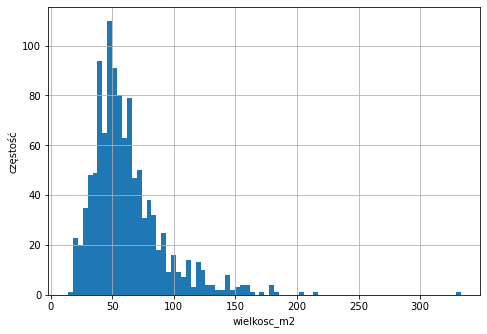

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.hist(df['wielkosc_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'],bins = 80)
plt.grid(True)
plt.xlabel('wielkosc_m2')
plt.ylabel('częstość')
# plt.title('Histogram metrażu mieszkań')
# plt.savefig('metraż.png', bbox_inches='tight')
plt.show()


In [19]:
df['wielkosc_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'].describe()

count    1123.000000
mean       61.405165
std        29.726001
min        14.000000
25%        42.000000
50%        55.000000
75%        72.000000
max       333.000000
Name: wielkosc_m2, dtype: float64

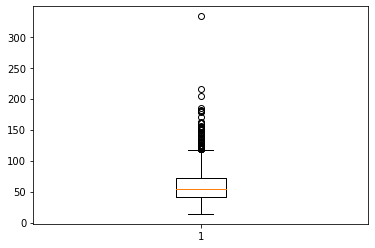

In [20]:
plt.boxplot(df['wielkosc_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'])
plt.show()

In [17]:
# pd.set_option('display.max_rows', None) #ustwanienie wyswietlajace wszystkie wyniki 
display(df[df['wielkosc_m2'] > df['wielkosc_m2'].quantile(.95)])

,name,cena,na_sprzedaz_przez,rodzaj_nierucomosci,liczba_pokoi,wielkosc_m2,opis,lokalizacja,cena_m2
88,Duży dom. Moze być połączony z biurem.,1900000,Agencja,Dom,6 lub więcej pokoi,538,OFERTA BIURA NIERUCHOMOŚCI\nDo sprzedania\nWol...,Ursynów,3532.0
937,"Mokotów, Wita Stwosza, 497 m2, działka 500 m2",4161000,Agencja,Dom,6 lub więcej pokoi,497,Na sprzedaż dom 7-pokojowy w prestiżowej lokal...,Mokotów,8372.0
939,"Dom w Parku, Marymont",4700000,Agencja,Dom,6 lub więcej pokoi,385,"Bielany Marymont, duży dom z widokiem na park....",Bielany,12208.0
942,"Ursynów, Dąbrówka, dom, 386 m2, 2000 r.",1690000,Agencja,Dom,6 lub więcej pokoi,386,Na sprzedaż dom wolno stojący o powierzchni 38...,Ursynów,4378.0
948,"Marysin Wawerski, dom 360 m2, 10 pok. Rolnicza",1790000,Agencja,Dom,6 lub więcej pokoi,361,Oferujemy do sprzedaży dom wolno stojący o pow...,Wawer,4958.0
...,...,...,...,...,...,...,...,...,...
5833,"Białołęka, \""inteligentny\"" dom wolnostojący, ...",1599000,Agencja,Dom,6 lub więcej pokoi,299,"Nowy, wolnostojący, energooszczędny i intelige...",Białołęka,5348.0
6035,Dom Warszawa Wawer 515m2 (nr: BRZ-DS-141988-96),2600000,Agencja,Dom,6 lub więcej pokoi,515,"Ekskluzywna willa , najładniejsza w okolicy, r...",Wawer,5049.0
6921,PIĘKNY DOM NA BIELANACH!,4500000,Agencja,Dom,5 pokoi,336,Pragnę państwu zaoferować dom wolnostojący o p...,Bielany,13393.0
7195,BIURO 1409 m,2500000,Agencja,Dom,6 lub więcej pokoi,1409,Włochy; Okęcie; Okolice: AUCHAN OKĘCIE; Krakow...,Włochy,1774.0


Freedman-Diaconis number of bins: 205


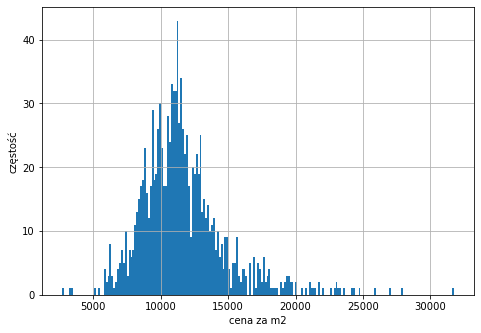

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#liczba przedzialow wg Freedman-Diaconis 
q25, q75 = np.percentile(df['cena_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'],[.25,.75])
bin_with = int(2*(q75 - q25) *len(df['cena_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'])**(-1/3))
# bins = int(round((df['cena_m2'].max() - df['cena_m2'].min())/ bin_with))

print('Freedman-Diaconis number of bins:', bin_with) #  Freedman-Diaconis rule 2*rozstep miedzykwartylowy / n^(-1/3)
plt.hist(df['cena_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'],bins = bin_with)
plt.grid(True)
plt.xlabel('cena za m2')
plt.ylabel('częstość')
# plt.title('Histogram ceny za metr mieszkania')
# plt.savefig('cena_m2.png', bbox_inches='tight')
plt.show()

In [23]:
df['cena_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'].describe()

count     1123.000000
mean     11645.441674
std       3173.965891
min       2661.000000
25%       9688.000000
50%      11207.000000
75%      12932.500000
max      31765.000000
Name: cena_m2, dtype: float64

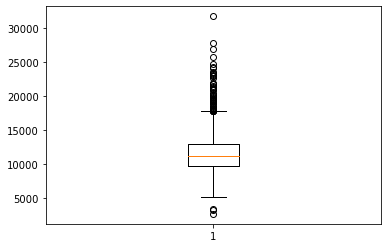

In [24]:
plt.boxplot(df['cena_m2'][df['rodzaj_nierucomosci'] == 'Mieszkanie'])
plt.show()

In [25]:
print(df['na_sprzedaz_przez'].value_counts())
# print(df.groupby('liczba_pokoi')['name'].count())
print(df['rodzaj_nierucomosci'].value_counts())



Agencja       1269
Właściciel       3
Name: na_sprzedaz_przez, dtype: int64
Mieszkanie    1123
Dom            149
Name: rodzaj_nierucomosci, dtype: int64


In [26]:
print(sorted(list(df['lokalizacja'][df['rodzaj_nierucomosci'] == 'Mieszkanie'].unique())))
# print(list(df.groupby('lokalizacja')['name'].count()))
list(df[df['rodzaj_nierucomosci'] == 'Mieszkanie'].groupby('lokalizacja')['name'].count())

['Bemowo', 'Białołęka', 'Bielany', 'Mokotów', 'Ochota', 'Praga Południe', 'Praga Północ', 'Rembertów', 'Targówek', 'Ursus', 'Ursynów', 'Wawer', 'Wesoła', 'Wilanów', 'Wola', 'Włochy', 'Śródmieście', 'Żoliborz']


[82, 92, 64, 190, 60, 77, 29, 8, 30, 22, 42, 10, 6, 22, 182, 21, 163, 23]

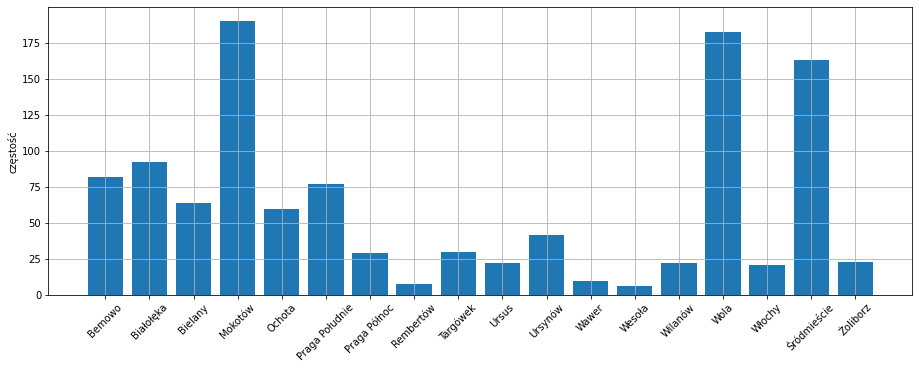

In [27]:
l = sorted(list(df['lokalizacja'][df['rodzaj_nierucomosci'] == 'Mieszkanie'].unique()))
s = list(df[df['rodzaj_nierucomosci'] == 'Mieszkanie'].groupby('lokalizacja')['name'].count())
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.grid(True)
ax.bar(l, s)
plt.xticks(rotation=45)
plt.ylabel('częstość')
# plt.title('Ilość mieszkań w podziale na dzielnice Warszawy')
# plt.savefig('ilosc_mieszkan_w_dzielnicy.png', bbox_inches='tight')
plt.show()

liczba_pokoi
2 pokoje                    427
3 pokoje                    393
4 pokoje                    145
5 pokoi                      34
6 lub więcej pokoi            9
Kawalerka lub garsoniera    115
Name: name, dtype: int64


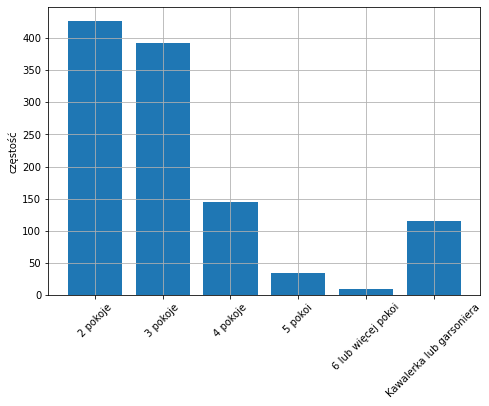

In [28]:
print(df[df['rodzaj_nierucomosci'] == 'Mieszkanie'].groupby('liczba_pokoi')['name'].count())
# print(df.groupby('liczba_pokoi')['name'].count())

l = sorted(list(df['liczba_pokoi'].unique()))
s = list(df[df['rodzaj_nierucomosci'] == 'Mieszkanie'].groupby('liczba_pokoi')['name'].count())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.grid(True)
ax.bar(l, s)
plt.xticks(rotation=45)
plt.ylabel('częstość')
# plt.title('Ilość mieszkań w podziale na liczbe pokoi w mieszkaniu')
plt.savefig('liczb_pokoi.png', bbox_inches='tight')


In [18]:
df.head()
# ['name', 'cena', 'na_sprzedaz_przez', 'rodzaj_nierucomosci','liczba_pokoi', 'wielkosc_m2', 'opis', 'lokalizacja', 'cena_m2']
df_ok = df[df['rodzaj_nierucomosci'] == 'Mieszkanie'].loc[:, ['cena','liczba_pokoi', 'wielkosc_m2', 'lokalizacja', 'cena_m2', 'opis']]
df_ok

,cena,liczba_pokoi,wielkosc_m2,lokalizacja,cena_m2,opis
0,610000,2 pokoje,35,Śródmieście,17429.0,Idealne pod Inwestycje ! Centrum Warszawy!\nPr...
1,630000,3 pokoje,54,Wola,11667.0,3 pokojowe mieszkanie o powierzchni 54m2 z wid...
2,1050150,4 pokoje,112,Białołęka,9376.0,"KUPNO OD DEWELOPERA, 0% prowizji, bez 2% PCC -..."
24,249000,Kawalerka lub garsoniera,20,Śródmieście,12450.0,OFERTA BEZPOŚREDNIA - NAJLEPSZA INWESTYCJA\nlo...
25,500000,2 pokoje,40,Wola,12500.0,OFERTA BEZPOŚREDNIA = BEZ PODATKU PCC I BEZ PR...
...,...,...,...,...,...,...
7508,516450,4 pokoje,62,Białołęka,8330.0,Mamy do zaoferowania Państwu w zacisznym miejs...
7511,715781,3 pokoje,73,Mokotów,9805.0,Mamy przyjemność zaprezentować Państwu 3 pokoj...
7513,1061454,4 pokoje,93,Wola,11413.0,LUKSUSOWE APARTAMENTY W WIEŻOWCU\nPrzedstawiam...
7516,812500,4 pokoje,91,Wilanów,8929.0,SUPER ROZKŁAD - SUPER OKAZJA !!\nPrezentujemy ...


In [30]:
df_ok.columns

Index(['cena', 'liczba_pokoi', 'wielkosc_m2', 'lokalizacja', 'cena_m2',
       'opis'],
      dtype='object')

In [31]:
# one hot encoding 

In [19]:
df_ok = pd.get_dummies(df_ok, columns=['liczba_pokoi', 'lokalizacja'])
df_ok

,cena,wielkosc_m2,cena_m2,opis,liczba_pokoi_2 pokoje,liczba_pokoi_3 pokoje,liczba_pokoi_4 pokoje,liczba_pokoi_5 pokoi,liczba_pokoi_6 lub więcej pokoi,liczba_pokoi_Kawalerka lub garsoniera,...,lokalizacja_Targówek,lokalizacja_Ursus,lokalizacja_Ursynów,lokalizacja_Wawer,lokalizacja_Wesoła,lokalizacja_Wilanów,lokalizacja_Wola,lokalizacja_Włochy,lokalizacja_Śródmieście,lokalizacja_Żoliborz
0,610000,35,17429.0,Idealne pod Inwestycje ! Centrum Warszawy!\nPr...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,630000,54,11667.0,3 pokojowe mieszkanie o powierzchni 54m2 z wid...,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1050150,112,9376.0,"KUPNO OD DEWELOPERA, 0% prowizji, bez 2% PCC -...",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,249000,20,12450.0,OFERTA BEZPOŚREDNIA - NAJLEPSZA INWESTYCJA\nlo...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
25,500000,40,12500.0,OFERTA BEZPOŚREDNIA = BEZ PODATKU PCC I BEZ PR...,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,516450,62,8330.0,Mamy do zaoferowania Państwu w zacisznym miejs...,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7511,715781,73,9805.0,Mamy przyjemność zaprezentować Państwu 3 pokoj...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7513,1061454,93,11413.0,LUKSUSOWE APARTAMENTY W WIEŻOWCU\nPrzedstawiam...,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7516,812500,91,8929.0,SUPER ROZKŁAD - SUPER OKAZJA !!\nPrezentujemy ...,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
df_ok.corr()['cena_m2']

cena                                     0.500140
wielkosc_m2                             -0.018121
cena_m2                                  1.000000
liczba_pokoi_2 pokoje                    0.098714
liczba_pokoi_3 pokoje                   -0.117880
liczba_pokoi_4 pokoje                   -0.095206
liczba_pokoi_5 pokoi                    -0.020216
liczba_pokoi_6 lub więcej pokoi          0.020902
liczba_pokoi_Kawalerka lub garsoniera    0.137969
lokalizacja_Bemowo                      -0.143888
lokalizacja_Białołęka                   -0.324598
lokalizacja_Bielany                     -0.077838
lokalizacja_Mokotów                      0.094857
lokalizacja_Ochota                       0.054444
lokalizacja_Praga Południe              -0.091105
lokalizacja_Praga Północ                -0.050158
lokalizacja_Rembertów                   -0.123476
lokalizacja_Targówek                    -0.105946
lokalizacja_Ursus                       -0.076486
lokalizacja_Ursynów                     -0.029671


In [34]:
# Warto zauważyć, że zmienna "cena_2" jest dodatnio skorelowana: 2 pokojowymi mieszkaniami, kawalerkami lub garsonierami, mieszkaniami w Mokotowie, Ochocie, Woli, Żoliborzu oraz umiarkowanie silnie z mieszkoaniami w Śrudmieściu.
# Wyraźniejssza ujemna korelacja występuje dla mieszkań 3 i 4 pokojowych, mieszkań na Bemowie , Białołęce, Rembertowie i Targówku.

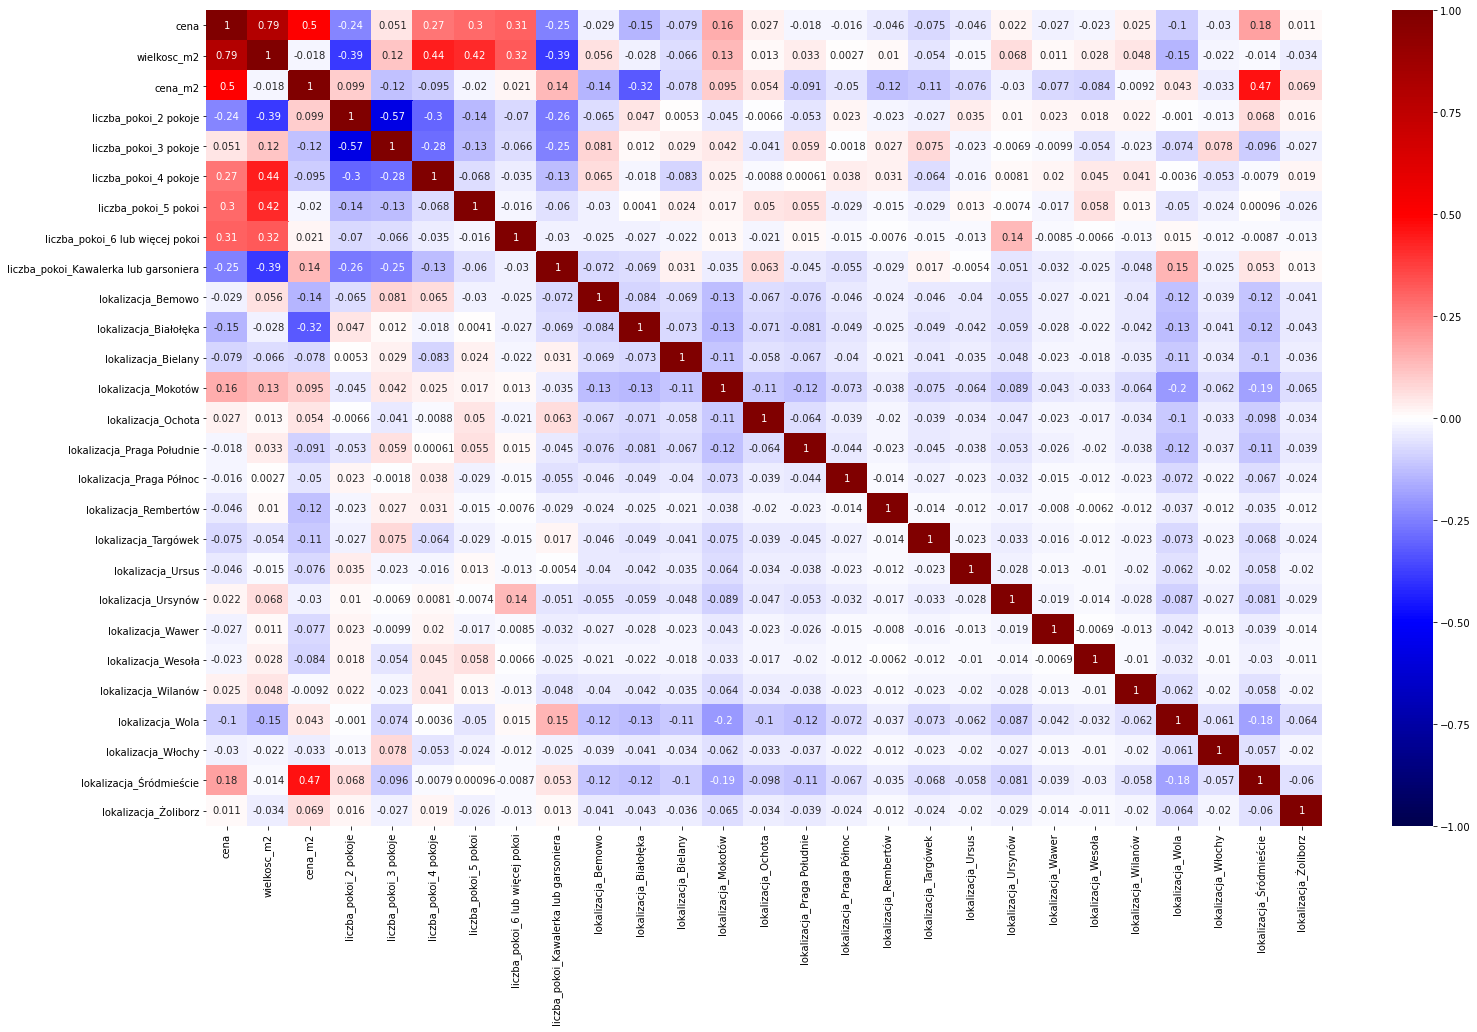

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))

sns.heatmap(df_ok.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
# plt.savefig('corr.png', bbox_inches='tight')
plt.show()

In [36]:
df_ok.columns

Index(['cena', 'wielkosc_m2', 'cena_m2', 'opis', 'liczba_pokoi_2 pokoje',
       'liczba_pokoi_3 pokoje', 'liczba_pokoi_4 pokoje',
       'liczba_pokoi_5 pokoi', 'liczba_pokoi_6 lub więcej pokoi',
       'liczba_pokoi_Kawalerka lub garsoniera', 'lokalizacja_Bemowo',
       'lokalizacja_Białołęka', 'lokalizacja_Bielany', 'lokalizacja_Mokotów',
       'lokalizacja_Ochota', 'lokalizacja_Praga Południe',
       'lokalizacja_Praga Północ', 'lokalizacja_Rembertów',
       'lokalizacja_Targówek', 'lokalizacja_Ursus', 'lokalizacja_Ursynów',
       'lokalizacja_Wawer', 'lokalizacja_Wesoła', 'lokalizacja_Wilanów',
       'lokalizacja_Wola', 'lokalizacja_Włochy', 'lokalizacja_Śródmieście',
       'lokalizacja_Żoliborz'],
      dtype='object')

In [37]:
#################################################to_do###############################################
#################################################to_do###############################################
#################################################to_do###############################################
#################################################to_do###############################################

In [38]:
##
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
y = df_ok['cena_m2']

X = df_ok.drop(['cena_m2','cena','opis'], axis=1) 
X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.2,random_state=42)
reg = LinearRegression().fit(X, y)
# R Squared
print(f'R Squared all data: {reg.score(X,y)}')

##test
LR = LinearRegression()
LR.fit(X_tn,y_tn)
y_predict = LR.predict(X_tt)
print(f'R Squared test data: {r2_score(y_tt,y_predict)}')
print(f'MAE:{mean_absolute_error(y_tt,y_predict)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_tt,y_predict))}')


R Squared all data: 0.4147006813634073
R Squared test data: 0.4138458470093276
MAE:1692.1128018056856
RMSE:2433.0475503084376


In [39]:
# zobaczmy czy zlogarytmowanie zmiennej wielkosc_m2 poprawi predykcje. tearetycznie powinno być lepiej gdyż rozkład zmiennej stanie się symetryczny 

In [40]:
df_ok_log = df_ok

from numpy import log2
df_ok_log["wielkosc_m2"] = df_ok_log['wielkosc_m2'].apply(lambda x: log2(x))
##
y = df_ok_log['cena_m2']

X = df_ok_log.drop(['cena_m2','cena','opis'], axis=1) #,jest "wielkosc_m2_log"
X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X, y)
# R Squared
print(f'R Squared all data: {reg.score(X,y)}')

##test
LR = LinearRegression()
LR.fit(X_tn,y_tn)
y_predict = LR.predict(X_tt)
print(f'R Squared test data: {r2_score(y_tt,y_predict)}')
print(f'MAE:{mean_absolute_error(y_tt,y_predict)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_tt,y_predict))}')


R Squared all data: 0.4073118409350879
R Squared test data: 0.40559465966241326
MAE:1697.102392396974
RMSE:2450.112493099919


In [41]:
# regresja wielomianowa z log2 na metrazu

In [42]:
from sklearn.preprocessing import PolynomialFeatures
X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(1, 5):
    poly_reg =  PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X_tn)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_tn)

    x_tt_poly = poly_reg.fit_transform(X_tt)
    y_tt_pred_poly =  lin_reg_2.predict(x_tt_poly)
    print(i)
    print(f'R Squared test data: {r2_score(y_tt,y_tt_pred_poly)}')
    print(f'MAE:{mean_absolute_error(y_tt,y_tt_pred_poly)}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_tt,y_tt_pred_poly))}')


1
R Squared test data: 0.40559465966241304
MAE:1697.1023923969742
RMSE:2450.1124930999194
2
R Squared test data: -1.291883130836398e+18
MAE:279060135851.30225
RMSE:3612071073046.8726
3
R Squared test data: -4.296181964101967e+17
MAE:208319920399.04666
RMSE:2082984351210.0627
4
R Squared test data: -2809934392416136.0
MAE:13633531769.580368
RMSE:168458435662.01248


In [43]:
##########################################################################################

In [44]:
# Lematyzacja - to sprowadzanie danego słowa do jego formy podstawowej tak aby różne formy tego wyrazu były
# rozpatrywane jako ten sam wyraz


In [45]:
# https://sjp.pl/slownik/odmiany/
# Słownik SJP.PL - wersja: odmiany słów
# Słownik udostępniany na licencjach GPL 2, LGPL 2.1, Apache 2.0 oraz Creative Commons Attribution 4.0 International

In [110]:
import gzip
import re

f = gzip.open('odm.txt.gz', 'rt', encoding='utf-8')
dictionary = {}  #key: value 
set_dict= set() # sprawdze czy wyraz z ogloszenia wystepuje w sjp ->> x for x in l if x in set_dict ]

for x in f:
    t = x.strip().split(',')
    tt = [ x.strip().lower() for x in t]
    for w in tt:
        set_dict.add(w)
        dictionary[w]=tt[0]

def lematize(w):
    w = w.replace('ą','ą')
    w = w.replace('ó','ó')
    w = w.replace('ę','ę')
    w = w.replace('ż','ż')
    return dictionary.get(w,w) # jesli brak w sjp to zwroci nowy wyraz/czesto literowki

In [99]:
ascii('ą'),ascii('ą')

("'a\\u0328'", "'\\u0105'")

In [76]:

import gzip
import re
sjp = gzip.open('odm.txt.gz', 'rt', encoding='utf-8')

worek = {}

for x in sjp:
        
#     s = x.strip().split(',')
#     sj = [ x.strip().lower() for x in s]
    for w in sj:
        set_dict.add(w)
        worek[w]=sj[0]

# def lematzyer(w):
#     return worek.get(w,w)


In [23]:
worek = {}
set_dict= set() # sprawdze czy wyraz z ogloszenia wystepuje w sjp ->> x for x in l if x in set_dict ]
with open('test_odm.txt', 'r', encoding='utf-8') as infile:  #docisk, dociskach, dociskami
    for x in infile:
        s = x.strip().split(',')  # strip usuwa z lepej i prawej spacje --> [docisk, dociskach, dociskami]
        sj = [ x.strip().lower() for x in s]
        for w in sj:
            set_dict.add(w)
            worek[w]=sj[0] # {docisk: docisk, dociskach:docisk, dociskami:docisk, ...,...}

    #     for line in infile:

In [24]:
worek

{'dociskacz': 'dociskacz',
 'dociskacza': 'dociskacz',
 'dociskaczach': 'dociskacz',
 'dociskaczami': 'dociskacz',
 'dociskacze': 'dociskacz',
 'dociskaczem': 'dociskacz',
 'dociskaczom': 'dociskacz',
 'dociskaczowi': 'dociskacz',
 'dociskaczu': 'dociskacz',
 'dociskaczy': 'dociskacz',
 'dociskać': 'dociskać',
 'dociska': 'dociskać',
 'dociskacie': 'dociskać',
 'dociskaj': 'dociskać',
 'dociskają': 'dociskać',
 'dociskając': 'dociskać',
 'dociskająca': 'dociskać',
 'dociskającą': 'dociskać',
 'dociskające': 'dociskać',
 'dociskającego': 'dociskać',
 'dociskającej': 'dociskać',
 'dociskającemu': 'dociskać',
 'dociskający': 'dociskać',
 'dociskających': 'dociskać',
 'dociskającym': 'dociskać',
 'dociskającymi': 'dociskać',
 'dociskajcie': 'dociskać',
 'dociskajcież': 'dociskać',
 'dociskajmy': 'dociskać',
 'dociskajmyż': 'dociskać',
 'dociskajże': 'dociskać',
 'dociskali': 'dociskać',
 'dociskaliby': 'dociskać',
 'dociskalibyście': 'dociskać',
 'dociskalibyśmy': 'dociskać',
 'dociskaliśc

In [79]:
sjp = gzip.open('odm.txt.gz', 'rt', encoding='utf-8')
worek = {}
for x in sjp:
    x
#     s = x.strip().split(',')
    

In [111]:
#przyklad uzycia lematyzera
lematize('samochodem')

'samochód'

In [49]:
##Tokenizacja
# df_okT =  df_ok[:2] #work version
# df_okT

In [112]:
opis1 = df_ok['opis'][:4]
opis1

0     Idealne pod Inwestycje ! Centrum Warszawy!\nPr...
1     3 pokojowe mieszkanie o powierzchni 54m2 z wid...
2     KUPNO OD DEWELOPERA, 0% prowizji, bez 2% PCC -...
24    OFERTA BEZPOŚREDNIA - NAJLEPSZA INWESTYCJA\nlo...
Name: opis, dtype: object

In [51]:
opis1[1]

'3 pokojowe mieszkanie o powierzchni 54m2 z widną kuchnią na Woli, przy ul. Anielewicza.\nMieszkanie składa się z pokoju dziennego, 2 sypialni ,oddzielnej kuchni ,łazienki, przedpokoju i balkonu .Do mieszkania przynależy piwnica. Osiedle ostatnio przeszło remont nawierzchni, w budynku wymieniono drzwi wejściowe oraz windy. Dwa lata temu wymieniono kaloryfery oraz instalację wodno-kanalizacyjną i elektryczną w całym bloku. Przed blokiem znajduje się parking dla mieszkańców z dwoma wjazdami zagrodzonymi szlabanami na pilota. Bardzo dobra lokalizacja, wszędzie blisko i dogodna komunikacja. Przystanki autobusowe i tramwajowe w pobliżu. Szkoły, przedszkola, żłobki. Liczne punkty usługowe i sklepy, 10min. do CH Arkadia.\nZapraszam na prezentację.\n--Treść niniejszego ogłoszenia nie stanowi oferty handlowej w rozumieniu Kodeksu Cywilnego--\nNumer oferty w biurze: AX010261\nLokalizacja: Mazowieckie, Warszawa, Wola, Mordechaja Anielewicza\n'

In [113]:

splitter = re.compile(r'[^ąąćęńłóóśśżżź\w]+')
raw_corpus=[] # [[]]
n=0 # ile dokumentow

for i in df_ok.iterrows():
    n+=1
    l = list(splitter.split(i[1][3]))
    raw_corpus.append(l)

all_words = [] # []
for t in raw_corpus:
    all_words[0:0] = t

print(f'Wszystkich słów: {len(all_words)} z {n} dokumentów')
 




Wszystkich słów: 226416 z 1123 dokumentów


In [54]:
# for i in df_ok[:2].iterrows():
#     print(i)
# for t in raw_corpus[:2]:
#     print(t)
# all_words[:100]

In [114]:
splitter = re.compile(r'[^ąąćęńłóóśśżżź\w]+')
for i in df_ok[:1].iterrows():
    print(splitter.split(i[1][3]))

['Idealne', 'pod', 'Inwestycje', 'Centrum', 'Warszawy', 'Pragnę', 'Państwu', 'zaprezentować', '2', 'pokojowe', '35m', 'mieszkanie', 'w', 'samym', 'Centrum', 'Warszawy', 'Ul', 'Zgoda', '9', 'Mieszkanie', 'składa', 'sie', 'z', '19m', 'salonu', 'z', 'aneksem', 'kuchennym', '10m', 'oddzielnej', 'sypialni', 'oraz', '2', '5m', 'łazienki', 'Na', 'całości', 'podłóg', 'deska', 'dębowa', 'W', 'pełni', 'wyposażona', 'kuchnia', 'w', 'sprzęt', 'AGD', 'tj', 'zmywarka', 'pralka', 'piekarnik', 'lodówko', 'zamrażalka', 'mikrofalówka', 'W', 'przedpokoju', 'oraz', 'sypialni', 'pojemne', 'szafy', 'Ekspozycja', 'okien', 'to', 'Południe', 'co', 'sprawia', 'że', 'jest', 'świetnie', 'doświetlone', 'a', 'odległość', 'miedzy', 'budynkami', 'zapewnia', 'dyskrecje', 'i', 'prywatność', 'Doskonała', 'komunikacja', 'miejska', 'w', 'każdym', 'kierunku', 'Warszawy', '4', 'minut', 'pieszo', 'do', 'stacji', 'Metro', 'Centrum', 'lub', 'Metro', 'Świętokrzyska', '10', 'minut', 'do', 'Dworca', 'Centralnego', 'Budynek', 'z',

In [68]:



# words
# print(words['mieszkanie'])
# pd.DataFrame(words)[:5].T

In [115]:
words = {}  #'mieszkanie': {'upper': 6, 'lower': 5},
for w in all_words:
    rec = words.get(w.lower(), {'upper':0, 'lower': 0})
    if w.lower()==w:
        rec['lower'] = rec['lower'] +1
    else: 
        rec['upper'] = rec['upper'] +1
    words[w.lower()] = rec


print(f'unikalnych słów: {len(words)} z {n} dokumentów')
ccw = pd.DataFrame(words).T
ccw.sort_values(by=['lower'], ascending=False)[:10] 
# najczesciej wystepujacymi znakami są spojniki itp. Znaki te tzw. stopwordsy nie stanowią treści dlatego zostaną odrzucone 

unikalnych słów: 13659 z 1123 dokumentów


,upper,lower
w,1698,6860
z,209,4934
i,346,4276
na,403,4210
_,0,4072
__,0,3781
m2,13,2652
do,655,2506
się,7,2066
oferty,8,1944


In [116]:
# counts = [ x[1] for x in counted_words ]
count = ccw['upper'] +  ccw['lower']  #przedstawiamy 24     państwu 195
counter = pd.DataFrame(count[:200]).sort_values(by=0, ascending=False)
counter[:10]

,0
w,8558
z,5143
i,4622
na,4613
_,4072
__,3781
do,3161
m2,2665
mieszkanie,2424
się,2073


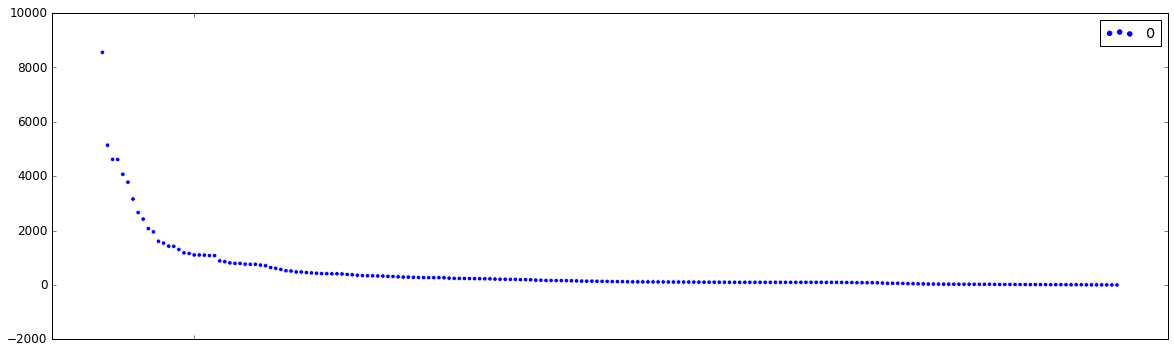

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.style.use("classic")

chart = sns.scatterplot(
                     color='purple', 
                     data=counter)
plt.xticks('')
plt.show()

In [86]:
# words
# przedstawiamy': {'upper': 24, 'lower': 0},
#  'państwu': {'upper': 193, 'lower': 2},
# [ x for x in words.keys()]
# words.keys()

In [117]:
# words      # przedstawiamy': {'upper': 24, 'lower': 0},  'państwu': {'upper': 193, 'lower': 2},
# [ x for x in words.keys()]   ## ['przedstawiamy','państwu','mieszkanie','położone', 'w',
# Stop wordsy

raw_stop_words = [ x for x in words.keys() if words[x]['upper']>=words[x]['lower']*4 ]   # pozbywam sie nazw ulic , miast , nazwisk 
print(len(raw_stop_words))
print(raw_stop_words[:3000])

2696
['przedstawiamy', 'państwu', 'woli', 'śródmieścia', 'pkp', 'skm', 'termin', 'ii', 'zapraszamy', 'płać', 'pcc', 'wybierz', 'największy', 'wybór', 'warszawie', 'okolicach', 'państwa', 'pomożemy', 'wspierania', 'pierwotnego', 'czekamy', 'doradztwo', 'sygnatura', 'psm', 'treść', 'kodeksu', 'cywilnego', 'informacja', 'numer', 'lokalizacja', 'mazowieckie', 'warszawa', 'wola', 'super', 'prezentujemy', 'wilanowa', 'spa', 'warszawy', 'pln', 'wilanów', 'zalety', 'mokotów', 'dolny', 'służew', 'rekreacja', 'gorąco', 'mokotowa', 'białołęki', 'białołęka', 'iii', 'rondo', 'wiatraczna', 'szaserów', 'praga', 'mokotowie', 'home', 'klika', 'kupujący', 'zapraszam', 'beata', 'puszczewicz', 'rs', 'ms', 'żoliborz', 'przasnyska', 'iv', 'uwaga', 'investorius', 'kupując', 'nieruchomość', 'hendi', 'bielanach', 'kwitnacą', 'conrada', 'jestem', 'oliwia', 'czarnowska', 'oms', 'bielany', 'bemowie', 'powstańców', 'śląskich', 'wrocławskiej', 'agd', 'budynek', 'bemowo', 'ratusz', 'leśny', 'ax010391', 'wrocławska',

In [88]:
##########to_do### usunac z stopwordsow recznie wyrazow ktore moga wplynac na cene mieszkania
# stop_words.remove(['from', 'subject', 're', 'edu', 'use'])
# raw_stop_words
s = ccw.loc[raw_stop_words].sort_values(by=['lower'], ascending=False)
# s
# s.to_excel('output1.xlsx', engine='xlsxwriter')  

In [104]:
# https://pl.wikipedia.org/wiki/Wikipedia:Stopwords
stop_words_wikipeda = ['a','aby','ach','acz','aczkolwiek','aj','albo','ale','ależ','ani','aż','bardziej','bardzo','bo','bowiem','by','byli','bynajmniej','być','był','była','było','były','będzie','będą'
,'cali','cała','cały','ci','cię','ciebie','co','cokolwiek','coś','czasami','czasem','czemu','czy','czyli','daleko','dla','dlaczego','dlatego','do','dobrze','dokąd','dość','dużo','dwa','dwaj','dwie','dwoje','dziś','dzisiaj',
'gdy','gdyby','gdyż','gdzie','gdziekolwiek','gdzieś','i','ich','ile','im','inna','inne','inny','innych','iż',
'ja','ją','jak','jaka','jakaś','jakby','jaki','jakichś','jakie','jakiś','jakiż','jakkolwiek','jako','jakoś','je','jeden','jedna','jedno','jednak','jednakże','jego','jej','jemu','jest','jestem','jeszcze','jeśli','jeżeli','już','ją','każdy','kiedy','kilka','kimś','kto','ktokolwiek','ktoś','która','które','którego','której','który','których','którym','którzy','ku'
,'lat','lecz','lub','ma','mają','mało','mam','mi','mimo','między','mną','mnie','mogą','moi','moim','moja','moje','może','możliwe','można','mój','mu','musi','my',
'na','nad','nam','nami','nas','nasi','nasz','nasza','nasze','naszego','naszych','natomiast','natychmiast','nawet','nią','nic','nich','nie','niech','niego','niej','niemu','nigdy','nim','nimi','niż','no'
,'o','obok','od','około','on','ona','one','oni','ono','oraz','oto','owszem',
'pan','pana','pani','po','pod','podczas','pomimo','ponad','ponieważ','powinien','powinna','powinni','powinno','poza','prawie','przecież','przed',
'przede','przedtem','przez','przy','roku','również','sama','są','się','skąd','sobie','sobą','sposób','swoje','ta','tak','taka','taki','takie','także','tam','te','tego','tej','temu','ten','teraz','też','to','tobą','tobie','toteż','trzeba','tu','tutaj','twoi','twoim','twoja','twoje','twym','twój','ty','tych','tylko','tym','u','w','wam','wami','was','wasz','wasza','wasze','we','według','wiele','wielu','więc','więcej','wszyscy','wszystkich','wszystkie','wszystkim','wszystko','wtedy','wy','właśnie','z','za','zapewne','zawsze','ze','zł','znowu','znów','został','żaden','żadna','żadne','żadnych','że','żeby']#,'ogłoszenie', 'dodać', 'pomoc', 'pro']


In [105]:
for i in stop_words_wikipeda:
    raw_stop_words.append(i)

raw_stop_words = pd.unique(raw_stop_words)
set_raw_stop_words = set(raw_stop_words)


In [118]:
print(len(set_raw_stop_words))
set_raw_stop_words

2958


{'interesująca',
 'rosoła',
 'żuromińska',
 'lipskiej',
 'gazomierz',
 'zienia',
 'zwracam',
 'pozyskanie',
 'jasnorzewskiej',
 'willa',
 'mokotowa',
 'ireneusz',
 'n43',
 'wojska',
 'choszczowka',
 'natychmiast',
 'bażantarnii',
 'brol',
 'szczęśliwiecki',
 'poziomy',
 'tesco',
 'koziorożca',
 'usługowychna',
 'moore',
 'n63',
 'wisłostrady',
 'westa',
 'zlikwidowany',
 'terespolskiej',
 'wymarzone',
 'murawski',
 'lazurowa',
 'punta',
 'wileńskiego',
 'był',
 'kwadrat',
 'rakowcu',
 'ponad',
 'trakt',
 'poznaj',
 'wil497880',
 'wchodząc',
 'polecamy',
 'kozłowskiego',
 'pkp',
 'ostroroga',
 'józefa',
 'belwederska',
 'najbliższe',
 'bartyckiej',
 'naszych',
 'great',
 'świętojańska',
 'międzylesie',
 'powinni',
 'feliksa',
 'niewielkie',
 'dwujęzyczna',
 'development',
 'tomcia',
 'bakalarskiej',
 'zakroczymskiej',
 'gotówka',
 'weker',
 'stryjeńskich',
 'nich',
 'pałacowy',
 'wisłostradzie',
 'wiejskiego',
 'jubilerskiej',
 'arkadii',
 'john',
 'biurowców',
 'sarmackiej',
 'oi',
 'w

In [61]:

#     [ x for x in l if x in slownik_sjp ]


In [119]:
def preprocessing(opis):
    opis = str(opis)
    tokenized = splitter.split(opis)
    l = list(tokenized)
    l = [ x.lower() for x in l ]
    l = [ x for x in l if len(x) > 2]
    l = [ x for x in l if len(x) < 16] #  'pływalniekawiarnie restauracjeplacówki',
    l = [ x for x in l if x.find('_') < 0]
    l = [ x for x in l if bool(re.search(r'\d', x)) is False]
    l = [ x for x in l if x not in set_raw_stop_words ]
    l = [ x for x in l if x in set_dict ]
    l = [ lematize(x) for x in l ]
    l = [ x for x in l if len(x) > 2]
    return l

In [108]:
df_ok['opis']

0       Idealne pod Inwestycje ! Centrum Warszawy!\nPr...
1       3 pokojowe mieszkanie o powierzchni 54m2 z wid...
2       KUPNO OD DEWELOPERA, 0% prowizji, bez 2% PCC -...
24      OFERTA BEZPOŚREDNIA - NAJLEPSZA INWESTYCJA\nlo...
25      OFERTA BEZPOŚREDNIA = BEZ PODATKU PCC I BEZ PR...
                              ...                        
7508    Mamy do zaoferowania Państwu w zacisznym miejs...
7511    Mamy przyjemność zaprezentować Państwu 3 pokoj...
7513    LUKSUSOWE APARTAMENTY W WIEŻOWCU\nPrzedstawiam...
7516    SUPER ROZKŁAD - SUPER OKAZJA !!\nPrezentujemy ...
7517    Przedstawiamy Państwu mieszkanie położone w at...
Name: opis, Length: 1123, dtype: object

In [120]:
print(preprocessing(opis1[0]))



['idealny', 'inwestycja', 'centrum', 'zaprezentować', 'pokojowy', 'mieszkanie', 'sam', 'centrum', 'mieszkanie', 'składać', 'salon', 'aneks', 'kuchenny', 'oddzielny', 'sypialny', 'łazienki', 'całość', 'podłoga', 'deska', 'dębowy', 'pełny', 'wyposażyć', 'kuchnia', 'sprzęt', 'zmywarka', 'pralka', 'piekarnik', 'lodówka', 'zamrażalka', 'mikrofalówka', 'przedpokój', 'sypialny', 'pojemny', 'szafa', 'ekspozycja', 'okno', 'południe', 'sprawiać', 'świetny', 'doświetlić', 'odległość', 'miedza', 'budynek', 'zapewniać', 'dyskrecja', 'prywatność', 'doskonały', 'komunikacja', 'miejski', 'każdy', 'kierunek', 'minuta', 'pieszy', 'stacja', 'metro', 'centrum', 'metro', 'minuta', 'centralny', 'wymienić', 'winda', 'całodobowy', 'ochrona', 'recepcja', 'medium', 'miejski', 'informacja', 'udzielić', 'telefoniczny', 'kontakt', 'nasz', 'oferta', 'mieszkanie', 'lokalizacja', 'kredytowy', 'wartość', 'informacja', 'niniejszy', 'ogłoszenie', 'stan', 'oferta', 'handlowy', 'rozumienie', 'oferta', 'biuro']


In [98]:
# opis1[0]

'Idealne pod Inwestycje ! Centrum Warszawy!\nPragnę Państwu zaprezentować 2 pokojowe, 35m mieszkanie w samym Centrum Warszawy. - Ul. Zgoda 9\nMieszkanie składa sie z 19m salonu z aneksem kuchennym, 10m oddzielnej sypialni oraz 2,5m łazienki. Na całości podłóg deska dębowa. W pełni wyposażona kuchnia w sprzęt AGD tj. zmywarka, pralka, piekarnik, lodówko-zamrażalka, mikrofalówka. W przedpokoju oraz sypialni pojemne szafy. Ekspozycja okien to Południe - co sprawia że jest świetnie doświetlone a odległość miedzy budynkami zapewnia dyskrecje i prywatność.\nDoskonała komunikacja miejska w każdym kierunku Warszawy - 4 minut pieszo do stacji Metro Centrum lub Metro Świętokrzyska, 10 minut do Dworca Centralnego.\nBudynek z lat 60-tych z wymienioną winda, całodobowa ochroną/recepcją. Wszystkie media miejskie.\nWięcej informacji udzielę telefonicznie.\nZapraszam do kontaktu.\n// W NASZEJ OFERCIE TAKŻE INNE MIESZKANIA W TEJ LOKALIZACJI\n// SKORZYSTAJ Z DOŚWIADCZENIA NASZYCH EKSPERTÓW KREDYTOWYCH I

In [121]:
df_ok["opis_tidy"] = df_ok['opis'].apply(lambda x: ' '.join(preprocessing(x)))

In [67]:
#list(df_ok["opis_tidy"])

In [68]:

# splitter = re.compile(r'[^ąąćęńłóóśśżżź\w]+')
raw_corpus_T=[] # [[]]
n=0 # ile dokumentow

for i in df_ok.iterrows():
    n+=1
    l = list(splitter.split(i[1][28]))
    raw_corpus_T.append(l)

    
all_words_T = [] # []
for t in raw_corpus_T:
    all_words_T[0:0] = t

print(f'Wszystkich słów wyczyszczonych: {len(all_words_T)} z {n} dokumentów')
## Wszystkich przed obrobką słów: 231871 z 1123 dokumentów
 

Wszystkich słów wyczyszczonych: 114507 z 1123 dokumentów


In [69]:
words_T = {}
for w in all_words_T:
    rec = words_T.get(w.lower(), {'upper':0, 'lower': 0})
    if w.lower()==w:
        rec['lower'] = rec['lower'] +1
    else: 
        rec['upper'] = rec['upper'] +1
    words_T[w.lower()] = rec


print(f'unikalnych wyczyszczonych słów: {len(words_T)} z {n} dokumentów')
ccw_T = pd.DataFrame(words_T).T
ccw_T.sort_values(by=['lower'], ascending=False)[:15] 


unikalnych wyczyszczonych słów: 3715 z 1123 dokumentów


,upper,lower
mieszkanie,0,4025
oferta,0,3097
nieruchomość,0,1211
biuro,0,1194
pokój,0,993
stan,0,979
kuchnia,0,903
budynek,0,877
znajdywać,0,875
centrum,0,846


In [70]:
# counts = [ x[1] for x in counted_words ]
count_T = ccw_T['upper'] +  ccw_T['lower']
counter_T = pd.DataFrame(count_T[:200]).sort_values(by=0, ascending=False)
counter_T[:10]

,0
mieszkanie,4025
oferta,3097
biuro,1194
pokój,993
stan,979
kuchnia,903
budynek,877
znajdywać,875
centrum,846
miejsce,820


In [71]:
# !pip install wordcloud

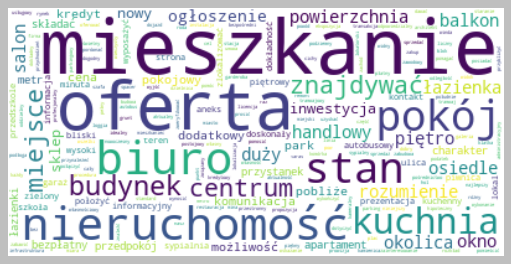

In [72]:
from wordcloud import WordCloud#, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(review for review in df_ok["opis_tidy"])
wordcloud = WordCloud(collocations=False, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('chmura_slow_po_preprocesingu.png', bbox_inches='tight')
plt.show()

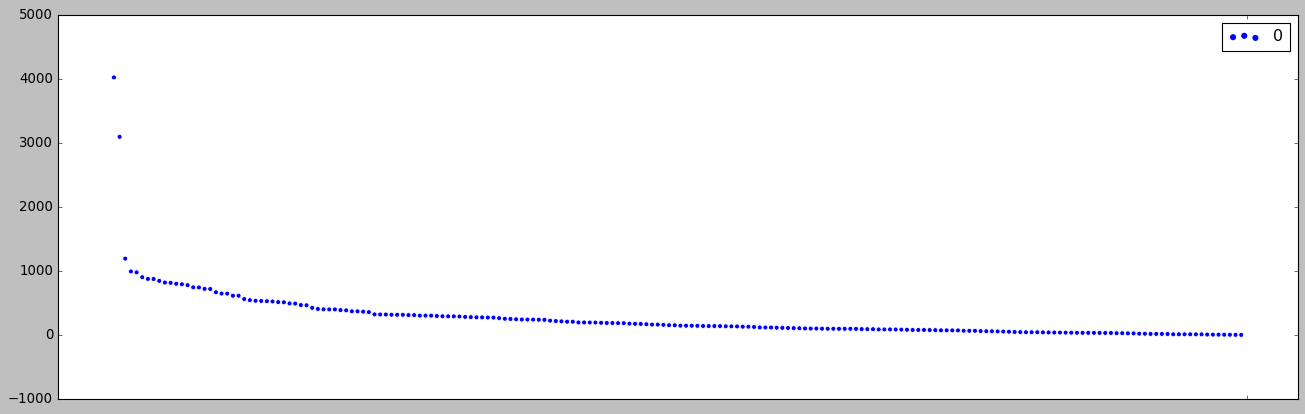

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.style.use("classic")

chart = sns.scatterplot(
                     color='purple', 
                     data=counter_T)
plt.xticks('')
# plt.savefig('czestosc_200_wyrazow_po_preprocesingu.png')
plt.show()

In [74]:
# df_ok["opis_tidy"].index

In [75]:
#-------------tfidf-------------#

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2)  # odrzucam wyrazy ktore wystapily tylko raz /i biore te ktore wystepuja co najmniej 2 razy
# max_df = 0.50 odrzucam wyrazy, które pojawiają się w ponad 50% dokumentów 
tfs = tfidf.fit_transform(df_ok["opis_tidy"])

feature_names = tfidf.get_feature_names()  # slownik wyrazow uporzadkowanych alfabetycznie 2525


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
# kosz do worda idzie
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(min_df=2) 
# tfs = tfidf.fit_transform(df_ok["opis_tidy"])

# feature_names = tfidf.get_feature_names()  
# df_tfidf = pd.DataFrame(tfs.toarray(),columns=tfidf.get_feature_names())
# df_ok.reset_index(drop=True,  inplace=True)
# df_test = pd.concat([df_ok, df_tfidf], axis=1)


In [78]:
# pd.DataFrame(tfs.toarray())

In [79]:
# przedstawienie danych metoda bagofword
#macierz  rzadka(pamietane sa tylko niezerowe pola) bo wiekszosc w macierzy ma wartosc 0 (tzn ze wyraz nie wystepuje albo tfidf jest bardzo niski)
df_tfidf = pd.DataFrame(tfs.toarray(),  #toarray() macierz rzadka na pelna macierz(z zerami )
columns=tfidf.get_feature_names())

In [80]:
# pd.set_option('max_columns', None) # reset pd.reset_option('max_columns')
# df_tfidf #1123 rows[liczba dokumentow] × 2525 columns[unikalne slowa wystepujace co najmniej 2x]

# pd.reset_option('max_columns')
# df_tfidf 


In [81]:
df_ok.reset_index(drop=True,  inplace=True)

In [82]:
df_test = pd.concat([df_ok, df_tfidf], axis=1)


In [83]:
df_ok['opis_tidy'][1]

'pokojowy mieszkanie powierzchnia widny kuchnia mieszkanie składać pokój dzienny sypialny oddzielny kuchnia łazienki przedpokój balkon mieszkanie przynależeć piwnica osiedle ostatnio przeszło remont nawierzchnia budynek wymienić drzwi wejściowy winda rok wymienić kaloryfer instalacja kanalizacyjny elektryczny cały blok blok znajdywać parking mieszkaniec dwa wjazd zagrodzić szlaban pilot dobry wszędzie bliski dogodny komunikacja przystanek autobusowy tramwajowy pobliże szkoła przedszkole żłobek liczny punkt usługowy sklep prezentacja niniejszy ogłoszenie stan oferta handlowy rozumienie oferta biuro'

In [84]:
# pd.reset_option('max_rows')
# pd.set_option("max_rows", None)
# pd.set_option("max_columns", None)
df_test.head()

,cena,wielkosc_m2,cena_m2,opis,liczba_pokoi_2 pokoje,liczba_pokoi_3 pokoje,liczba_pokoi_4 pokoje,liczba_pokoi_5 pokoi,liczba_pokoi_6 lub więcej pokoi,liczba_pokoi_Kawalerka lub garsoniera,...,świetny,świeży,źródło,żaden,żaluzja,żyto,żywność,żywy,żyć,żłobek
0,610000,5.129283,17429.0,Idealne pod Inwestycje ! Centrum Warszawy!\nPr...,1,0,0,0,0,0,...,0.096447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,630000,5.754888,11667.0,3 pokojowe mieszkanie o powierzchni 54m2 z wid...,0,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138658
2,1050150,6.807355,9376.0,"KUPNO OD DEWELOPERA, 0% prowizji, bez 2% PCC -...",0,0,1,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,249000,4.321928,12450.0,OFERTA BEZPOŚREDNIA - NAJLEPSZA INWESTYCJA\nlo...,0,0,0,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,500000,5.321928,12500.0,OFERTA BEZPOŚREDNIA = BEZ PODATKU PCC I BEZ PR...,1,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [85]:
#--------------------------ML--------------------------#

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import math

In [87]:
# log na metraz   ##df_test = pd.concat([df_ok, df_tfidf], axis=1)
y = df_test['cena_m2']
X = df_test.drop(['cena_m2', 'opis', 'opis_tidy', 'cena'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
X.shape

(1123, 2547)

In [89]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1123, 2547)
(1123,)
(898, 2547)
(898,)
(225, 2547)
(225,)


In [90]:
# https://www.mobilo24.eu/python-sprawdzanie-poprawnosci-modelu-w-predykcji-danych/
model = LinearRegression()
model.fit(X,y)  #tfidf
from sklearn.metrics import mean_squared_error, r2_score
yp = model.predict(X)
print(mean_squared_error(y,yp)) #MSE
print(math.sqrt(mean_squared_error(y,yp))) #RMSE
print(r2_score(y, yp))

104324.90667784394
322.99366352584065
0.9896349740538605


In [91]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

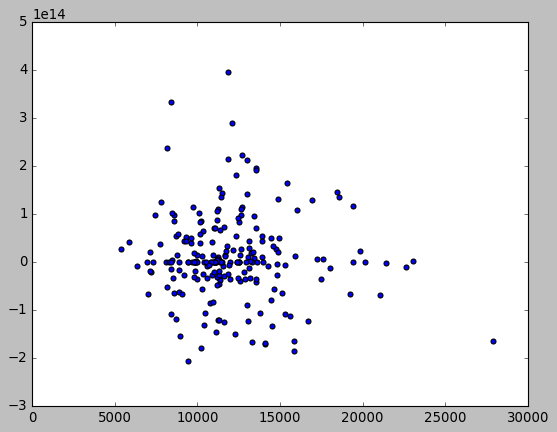

In [92]:
import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('dla wszysttkich slow ze slownika')


print(mean_absolute_error(y_test, y_pred)) #MAE
print(mean_squared_error(y_test, y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test, y_pred))) #RMSE
print(r2_score(y_test, y_pred))

dla wszysttkich slow ze slownika
57721765488904.39
7.66785641087353e+27
87566297231717.69
-7.592496925005405e+20


In [94]:
print('Regresja wielomianowa')

from sklearn.preprocessing import PolynomialFeatures
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(1, 1): #(1, 5):
    poly_reg =  PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_train)

    x_tt_poly = poly_reg.fit_transform(X_test)
    y_tt_pred_poly =  lin_reg_2.predict(x_tt_poly)
    print(i)
    print(f'R Squared test data: {r2_score(y_test,y_tt_pred_poly)}')
    print(f'MAE:{mean_absolute_error(y_test,y_tt_pred_poly)}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_tt_pred_poly))}')


Regresja wielomianowa


In [95]:
# ################## 
# # df_test = pd.concat([df_ok, df_tfidf], axis=1)
# from numpy import log2
# df_test2 = df_test
# df_test2["wielkosc_m2"] = df_test2['wielkosc_m2'].apply(lambda x: log2(x))
# y2 = df_test2['cena_m2']
# X2 = df_test2.drop(['cena_m2', 'opis', 'opis_tidy', 'cena'], axis=1)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
# model = LinearRegression()
# model.fit(X2_train,y2_train)
# y2_pred = model.predict(X2_test)
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# print(mean_absolute_error(y2_test, y2_pred)) #MAE
# print(mean_squared_error(y2_test, y2_pred)) #MSE
# print(math.sqrt(mean_squared_error(y2_test, y2_pred))) #RMSE
# print(r2_score(y2_test, y2_pred))



In [96]:
################### odrzucam wyrazy czesto wystepujace #####################

In [97]:
# tfidf = TfidfVectorizer(min_df=2) 
#TfidfVectorizer(min_df=2).fit_transform(df_ok["opis_tidy"])
# max_df = 0.50 odrzucam wyrazy, które pojawiają się w ponad 50% dokumentów 

In [98]:

for i in range(1,10):
    for a in np.arange(0.3,0.9, 0.1):
        tfidf2 = TfidfVectorizer(min_df=i, max_df = a) #
        tfs2 = tfidf2.fit_transform(df_ok["opis_tidy"])
        feature_names2 = tfidf2.get_feature_names()
        df_tfidf2 = pd.DataFrame(tfs2.toarray(),columns=tfidf2.get_feature_names())
        df_test3 = pd.concat([df_ok, df_tfidf2], axis=1)

        #df_test3["wielkosc_m2"] = df_test3['wielkosc_m2'].apply(lambda x: log2(x))
        y2 = df_test3['cena_m2']
        X2 = df_test3.drop(['cena_m2', 'opis', 'opis_tidy', 'cena'], axis=1)
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X2_train,y2_train)
        y2_pred = model.predict(X2_test)
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
        print('i', i, 'a', a, mean_absolute_error(y2_test, y2_pred), mean_squared_error(y2_test, y2_pred),math.sqrt(mean_squared_error(y2_test, y2_pred)), r2_score(y2_test, y2_pred))
       


i 1 a 0.3 71383925074426.53 1.2762965416249995e+28 112973295146463.69 -1.2637531336582391e+21
i 1 a 0.4 24524663446402.355 1.2293543578029466e+27 35062149931271.28 -1.217272296351927e+20
i 1 a 0.5 90587138870012.44 2.0352784776977362e+28 142663186481227.03 -2.0152758157464426e+21
i 1 a 0.6000000000000001 19616873973510.234 7.99060171183501e+26 28267652381892.293 -7.912070293859195e+19
i 1 a 0.7000000000000002 27937881156078.215 1.9686262248164874e+27 44369203563017.53 -1.9492786194077188e+20
i 1 a 0.8000000000000003 7089904503372.685 1.076195924306545e+26 10373986332681.111 -1.0656190998065316e+19
i 1 a 0.9000000000000001 7089904503372.685 1.076195924306545e+26 10373986332681.111 -1.0656190998065316e+19
i 2 a 0.3 21894006943796.723 1.1137775589861732e+27 33373306084147.152 -1.102831383194771e+20
i 2 a 0.4 7754268781352.911 1.2391681277281362e+26 11131792882227.625 -1.226989616811143e+19
i 2 a 0.5 75485341223251.23 1.2507800497924255e+28 111838278321531.11 -1.2384874172187638e+21
i 2 a 

In [99]:
#wszystkie analizowane mozliwosci charakteryzują się ujemnym r2. Moze to swiadczyc o analizowaniu zbyt wielu zmiennych

In [101]:
yi = df_test['cena_m2']
Xi = df_test.loc[:, ['wielkosc_m2', 'liczba_pokoi_2 pokoje', 'liczba_pokoi_3 pokoje',
       'liczba_pokoi_4 pokoje', 'liczba_pokoi_5 pokoi',
       'liczba_pokoi_6 lub więcej pokoi',
       'liczba_pokoi_Kawalerka lub garsoniera', 'lokalizacja_Bemowo',
       'lokalizacja_Białołęka', 'lokalizacja_Bielany', 'lokalizacja_Mokotów',
       'lokalizacja_Ochota', 'lokalizacja_Praga Południe',
       'lokalizacja_Praga Północ', 'lokalizacja_Rembertów',
       'lokalizacja_Targówek', 'lokalizacja_Ursus', 'lokalizacja_Ursynów',
       'lokalizacja_Wawer', 'lokalizacja_Wesoła', 'lokalizacja_Wilanów',
       'lokalizacja_Wola', 'lokalizacja_Włochy', 'lokalizacja_Śródmieście',
       'alarm', 'altana', 'aneks', 'antresola', 'antywłamaniowy', 'apartament',
       'apartamentowiec', 'autostrada', 'balkon', 'balkonik', 'bazar',
       'bazarek', 'biblioteka', 'bilard', 'bliźniak', 'ceglany',
       'cegła', 'czteropiętrowy', 'czujnik', 'garaż', 'garderoba', 'gaz',
       'gazowy', 'hol', 'jadalnia', 'jezioro', 'kamera', 'kamienica',
       'klimatyzacja', 'kominek', 'kotłownia', 'kościół', 'las', 'liceum',
       'lodowisko', 'loggia', 'nowiutki', 'nowoczesność', 'obrzeże', 'ogród',
       'ogródek', 'oligoceński', 'park', 'patio', 'piwnica', 'podziemny',
       'prysznic', 'przedszkole', 'pustak', 'pływalnia', 'retro', 'rowerownia',
       'salon', 'satelitarny', 'stacja', 'sypialnia', 'taras', 'targowisko',
       'teatr', 'terakota', 'termoizolacja', 'tramwajowy', 'trzypokojowy',
       'uczelnia', 'wanna', 'wentylacja', 'winda', 'wyspa', 'zabytek',
       'zieleń', 'zielony', 'zmywarka', 'zsyp', 'żłobek']]

X_traini, X_testi, y_traini, y_testi = train_test_split(Xi, yi, test_size=0.2, random_state=42)

In [102]:
for i in range(1, 4):
    poly_reg =  PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X_traini)
    lin_reg_i = LinearRegression()
    lin_reg_i.fit(X_poly, y_traini)

    x_tt_poly = poly_reg.fit_transform(X_testi)
    y_tt_pred_poly =  lin_reg_i.predict(x_tt_poly)
    print(i)
    print(f'R Squared  data: {r2_score(y_testi,y_tt_pred_poly)}')
    print(f'MAE:{mean_absolute_error(y_testi,y_tt_pred_poly)}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_testi,y_tt_pred_poly))}')


1
R Squared  data: -552728101.4335917
MAE:7014554.51
RMSE:74713734.79423288
2
R Squared  data: -32336759272521.08
MAE:4434974664.819334
RMSE:18071446662.642277
3
R Squared  data: -2514048189.2213635
MAE:39491837.56509897
RMSE:159342443.4270811


In [103]:
model = LinearRegression()
model.fit(X_traini,y_traini)
yi_pred = model.predict(X_testi)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print( mean_absolute_error(y2_test, y2_pred))
print(  mean_squared_error(y2_test, y2_pred))
print( math.sqrt(mean_squared_error(y2_test, y2_pred)))
print(  r2_score(y2_test, y2_pred))
       

24229382685181.68
1.371920032117308e+27
37039438874223.086
-1.358436839066649e+20


In [104]:
import nltk
tfidf2 = TfidfVectorizer(min_df=7, max_df = 0.6) #
tfs2 = tfidf2.fit_transform(df_ok["opis_tidy"])
feature_names2 = tfidf2.get_feature_names()
####################BagOfWords#############

import nltk 
sentence_vectors = []
for sentence in df_ok["opis_tidy"]:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in feature_names2:                                         # feature_names2 odrzucone  min_df=7, max_df = 0.60
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [105]:

sentence_vectors = np.asarray(sentence_vectors)
df_bagofwords = pd.DataFrame(sentence_vectors, columns = feature_names2)
df_test4 = pd.concat([df_ok, df_bagofwords], axis=1)

In [ ]:
df_test4

In [106]:
y4 = df_test4['cena_m2']
X4 = df_test4.drop(['cena_m2', 'opis', 'opis_tidy', 'cena'], axis=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)
model = LinearRegression()
model.fit(X4_train,y4_train)
y4_pred = model.predict(X4_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_absolute_error(y4_test, y4_pred)) #MAE
print(mean_squared_error(y4_test, y4_pred)) #MSE
print(math.sqrt(mean_squared_error(y4_test, y4_pred))) #RMSE
print(r2_score(y4_test, y4_pred))

34892969003706.01
2.677087163877533e+27
51740575604428.03
-3.118409806337511e+20


In [107]:
############################
####################BagOfWords############# 

import nltk 
sentence_vectors2 = []
for sentence in df_ok["opis_tidy"]:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in feature_names:  # feature_names nie odrzucone
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors2.append(sent_vec)

In [108]:
sentence_vectors2 = np.asarray(sentence_vectors2)
df_bagofwords2 = pd.DataFrame(sentence_vectors2, columns = feature_names)
df_test5 = pd.concat([df_ok, df_bagofwords2], axis=1)

In [109]:
y5 = df_test5['cena_m2']
X5 = df_test5.drop(['cena_m2', 'opis', 'opis_tidy', 'cena'], axis=1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2)
model = LinearRegression()
model.fit(X5_train,y5_train)
y5_pred = model.predict(X5_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_absolute_error(y5_test, y5_pred)) #MAE
print(mean_squared_error(y5_test, y5_pred)) #MSE
print(math.sqrt(mean_squared_error(y5_test, y5_pred))) #RMSE
print(r2_score(y5_test, y5_pred))

1169610118912159.8
3.470100920892202e+30
1862820689409531.5
-3.072416195306371e+23


In [110]:
df_test6 = df_test5

In [111]:
pd.set_option("max_columns", None)
y6 = df_test6['cena_m2']
X6 = df_test6.iloc[:, np.r_[1,4:27,47,51,58,59,60,61,62,87,89,90, 106, 107, 123,124,132,143,186,187,242,245,362:360,482,484,488,489,559,597,618,629,632,677,696,736,740,790,804, 820,823,1024:1026,1043,1110,1111,1133,1193,1205,1238,1302,1461,1481,1565,1582,1613,1633,1685,1693,1784,1853,1918,1921,1924,1936,1941,1954,1972,1993,2076,2093,2127,2263,2316,2443,2444,2465,2484,2552]]
X6

,wielkosc_m2,liczba_pokoi_2 pokoje,liczba_pokoi_3 pokoje,liczba_pokoi_4 pokoje,liczba_pokoi_5 pokoi,liczba_pokoi_6 lub więcej pokoi,liczba_pokoi_Kawalerka lub garsoniera,lokalizacja_Bemowo,lokalizacja_Białołęka,lokalizacja_Bielany,lokalizacja_Mokotów,lokalizacja_Ochota,lokalizacja_Praga Południe,lokalizacja_Praga Północ,lokalizacja_Rembertów,lokalizacja_Targówek,lokalizacja_Ursus,lokalizacja_Ursynów,lokalizacja_Wawer,lokalizacja_Wesoła,lokalizacja_Wilanów,lokalizacja_Wola,lokalizacja_Włochy,lokalizacja_Śródmieście,alarm,altana,aneks,antresola,antywłamaniowy,apartament,apartamentowiec,autostrada,balkon,balkonik,bazar,bazarek,biblioteka,bidet,bilard,bliźniak,ceglany,cegła,czteropiętrowy,czujnik,garaż,garderoba,gaz,gazowy,hol,jadalnia,jezioro,kamera,kamienica,klimatyzacja,kominek,kotłownia,kościół,las,liceum,lodowisko,loggia,nowiutki,nowoczesność,obrzeże,ogród,ogródek,oligoceński,park,patio,piwnica,podziemny,prysznic,przedszkole,pustak,pływalnia,retro,rowerownia,salon,satelitarny,stacja,sypialnia,taras,targowisko,teatr,terakota,termoizolacja,tramwajowy,trzypokojowy,uczelnia,wanna,wentylacja,winda,wyspa,zabytek,zieleń,zielony,zmywarka,zsyp,żłobek
0,5.129283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,5.754888,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,6.807355,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
3,4.321928,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.321928,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,5.954196,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1119,6.189825,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1120,6.539159,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1121,6.507795,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X6.columns

In [112]:

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2)
model = LinearRegression()
model.fit(X6_train,y6_train)
y6_pred = model.predict(X6_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_absolute_error(y6_test, y6_pred)) #MAE
print(mean_squared_error(y6_test, y6_pred)) #MSE
print(math.sqrt(mean_squared_error(y6_test, y6_pred))) #RMSE
print(r2_score(y6_test, y6_pred))

1502.8933333333334
4056624.946666667
2014.1064884128314
0.3849946455114116


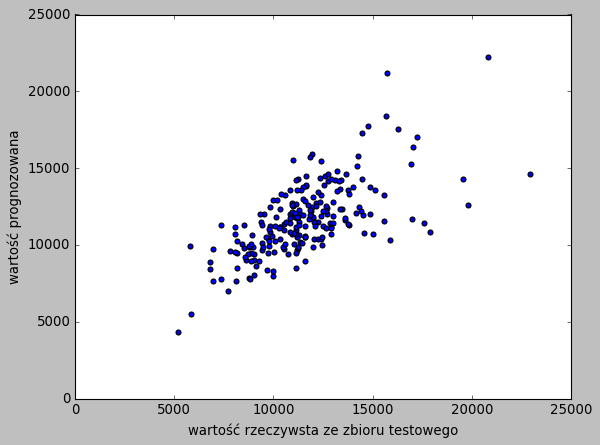

In [115]:
plt.scatter(y6_test, y6_pred)
plt.xlabel("wartość rzeczywsta ze zbioru testowego")
plt.ylabel("wartość prognozowana")
plt.savefig('zaleznosc_ypere_ytest')

In [116]:
for i in range(1, 4):
    poly_reg =  PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X6_train)
    lin_reg_i = LinearRegression()
    lin_reg_i.fit(X_poly, y6_train)

    x_tt_poly = poly_reg.fit_transform(X6_test)
    y_tt_pred_poly =  lin_reg_i.predict(x_tt_poly)
    print(i)
    print(f'R Squared  data: {r2_score(y6_test,y_tt_pred_poly)}')
    print(f'MAE:{mean_absolute_error(y6_test,y_tt_pred_poly)}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y6_test,y_tt_pred_poly))}')


1
R Squared  data: 0.38551359054727496
MAE:1501.9355555555555
RMSE:2013.25655179198
2
R Squared  data: -978509547448583.0
MAE:51477509020.03366
RMSE:80338832059.95699
3
R Squared  data: -2.297093828895315e+21
MAE:74953684930077.38
RMSE:123092714088331.56
